# **Problem Statement:**
# Create a Machine Learning model using various Classification Models to predict rainfall.


**Importing usefull Library**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import the Dataset and read the dataset**

In [3]:
df = pd.read_excel("D:/projects/ML/Weather prediciton/sydney_rain prediction.xlsx")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


#**Data Exploration**.

In [6]:
# Check no. of rows and columns
df.shape

(3337, 17)

In [7]:
# Check column and their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

Both "RainToday" and "RainTomorrow" are object (Yes/No). I will convert them into binary (1/0) for our convenience. But first let's check missing value and missing value percentage.

In [9]:
# Create a DataFrame to display both the count and percentage of missing values
missing_data = df.isnull().sum().to_frame(name='Missing Values')
missing_data['Percentage (%)'] = (df.isnull().mean() * 100)

# Display columns with missing values only
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)

missing_data


,Missing Values,Percentage (%)
Cloud9am,566,16.961343
Cloud3pm,561,16.811507
Evaporation,51,1.528319
Pressure9am,20,0.599341
Pressure3pm,19,0.569374
Sunshine,16,0.479473
Humidity9am,14,0.419539
Humidity3pm,13,0.389571
Rainfall,6,0.179802
RainToday,6,0.179802


Here, we can clearly see there are lots of missing values.
Cloud9am, Cloud3pm contain null values more than 16%, it will not help to improve out models.
Date and Location information does not needed, so this will be dropped.

In [11]:
# dropping Date and Location
df = df.drop(['Date','Location'], axis=1)
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [12]:
#segrregate numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']

In [13]:
numerical_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [14]:
categorical_features

['RainToday', 'RainTomorrow']

In [15]:
# Filling missing values
for col in df.columns:
  if col in numerical_features:
    df[col] = df[col].fillna(df[col].median())
  elif col in categorical_features:
    df[col] = df[col].fillna(df[col].mode()[0])

# again check missing values



In [17]:
df.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

Now, there is no missing values.

In [19]:
# Convert 'RainToday' and 'RainTomorrow' from Yes/No to 0/1
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Check the data types and the first few rows to confirm the changes
print(df.dtypes)
print(df[['RainToday', 'RainTomorrow']].head())


MinTemp         float64
MaxTemp         float64
Rainfall        float64
Evaporation     float64
Sunshine        float64
Humidity9am     float64
Humidity3pm     float64
Pressure9am     float64
Pressure3pm     float64
Cloud9am        float64
Cloud3pm        float64
Temp9am         float64
Temp3pm         float64
RainToday         int64
RainTomorrow      int64
dtype: object
   RainToday  RainTomorrow
0          1             1
1          1             1
2          1             1
3          1             1
4          1             1


# **Check for Outliers**

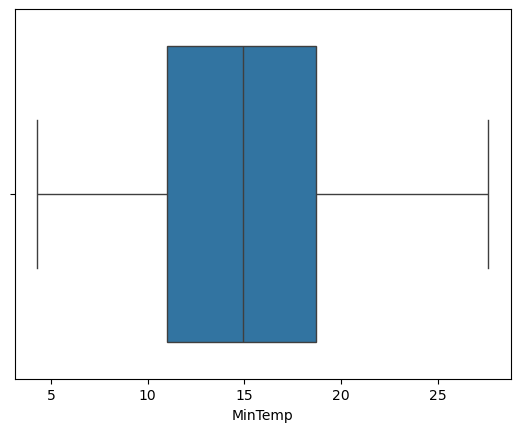

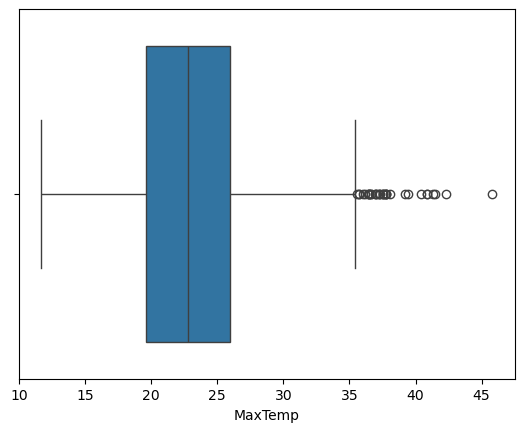

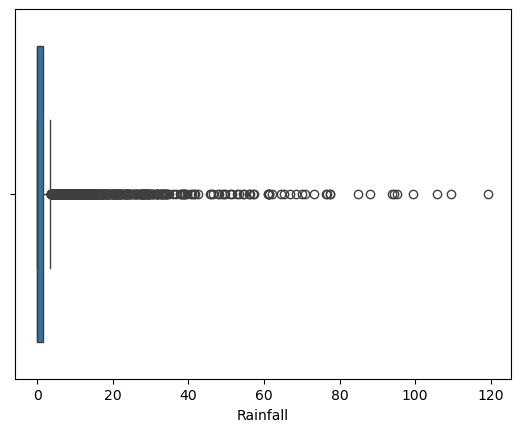

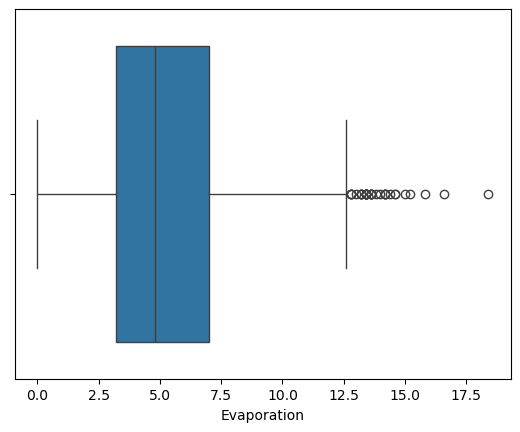

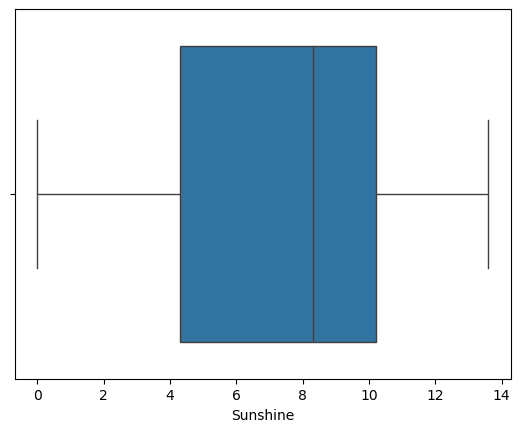

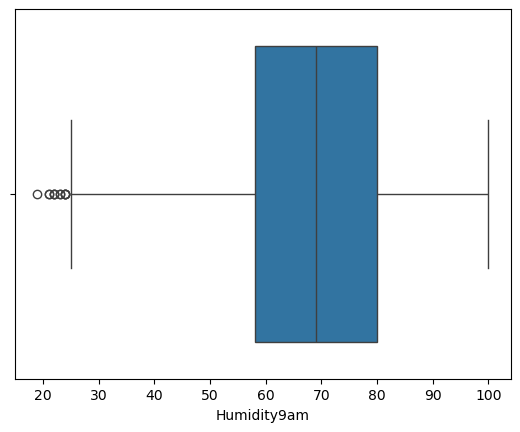

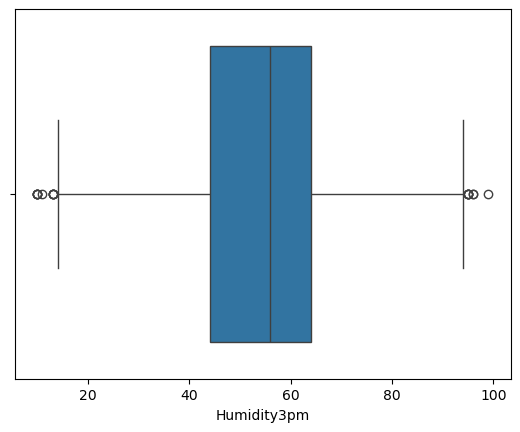

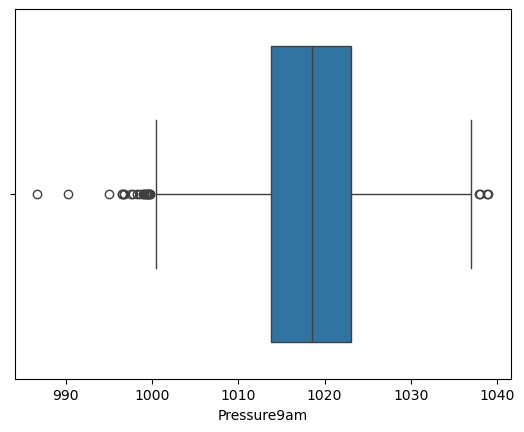

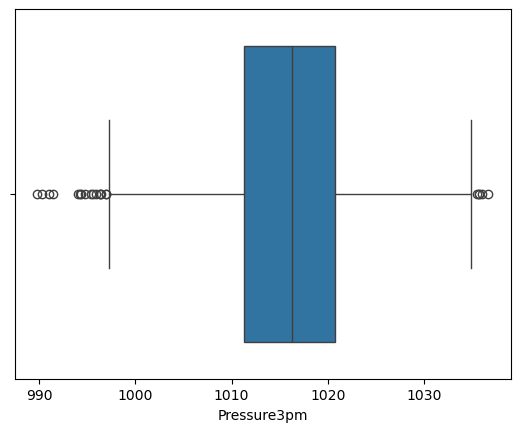

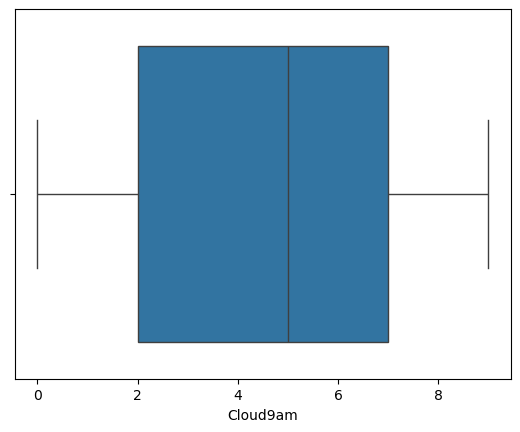

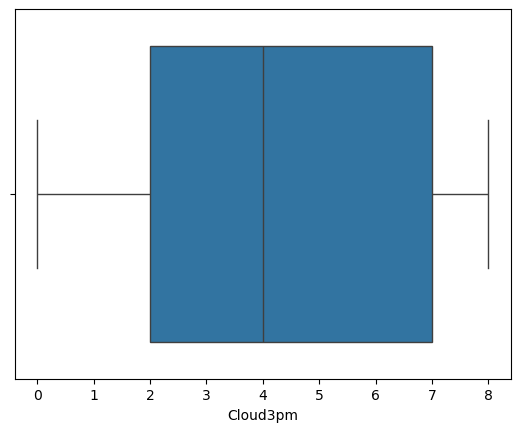

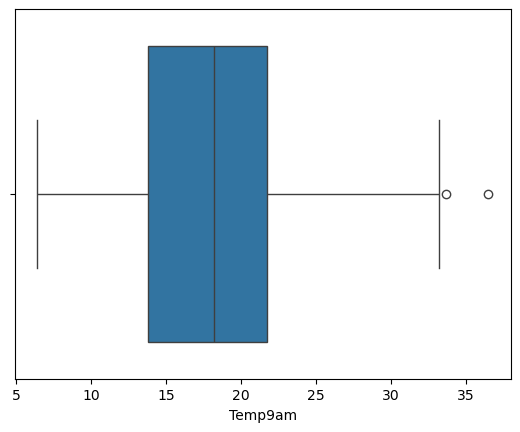

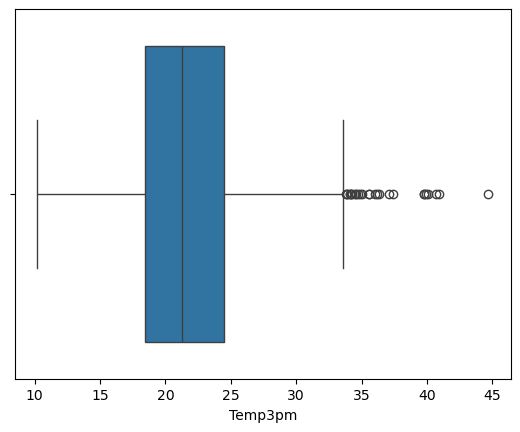

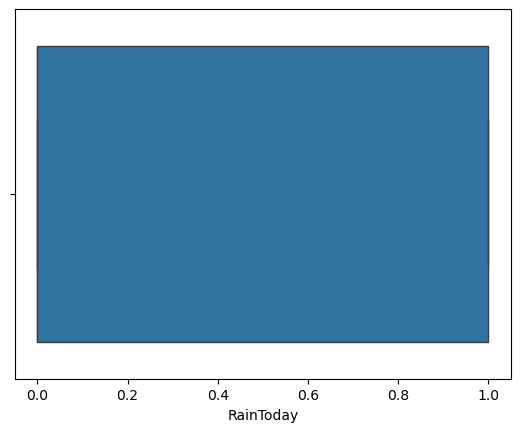

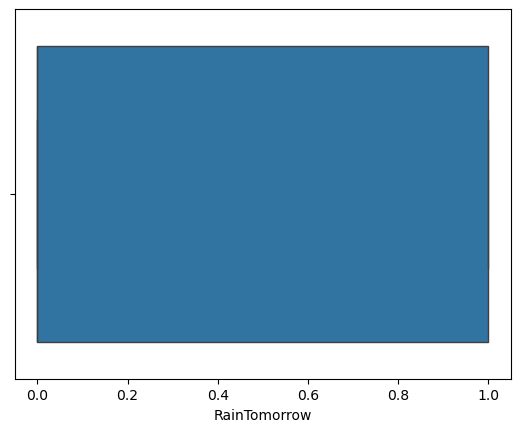

In [21]:
for coll in df.select_dtypes(include=np.number).columns:
  sns.boxplot(x=df[coll])
  plt.show()

In [22]:
# check statistics of dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865088,23.002218,3.324243,5.181510,7.184747,68.232245,54.704225,1018.347678,1016.020375,4.320348,4.181900,17.820198,21.533054,0.259515,0.259215
std,4.551593,4.493293,9.887277,2.756505,3.802525,15.053751,16.261954,7.000519,7.012189,2.524256,2.410918,4.894258,4.301163,0.438434,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000


In [23]:
# Define the columns
columns = numerical_features

# Function to cap outliers
def cap_outliers(df, column):
    # Calculate the 1st and 99th percentiles
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)

    # Cap the outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Cap outliers in both columns
for col in columns:
    df = cap_outliers(df, col)

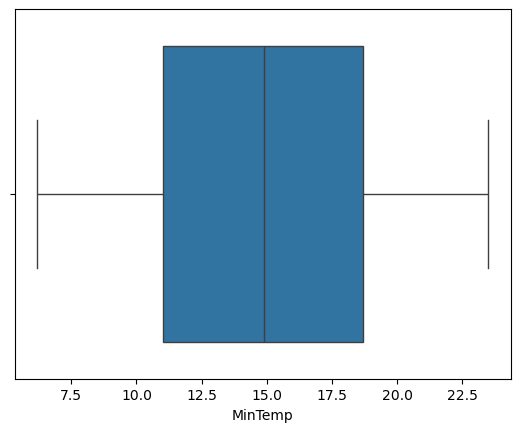

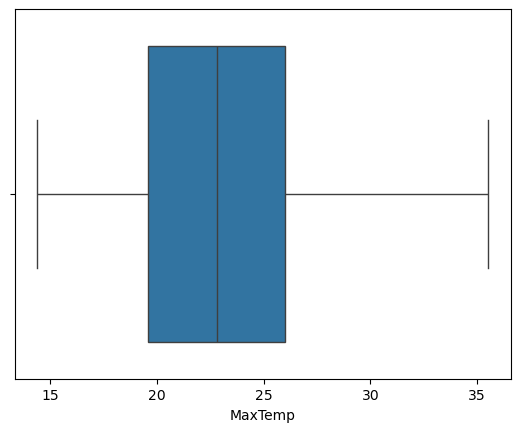

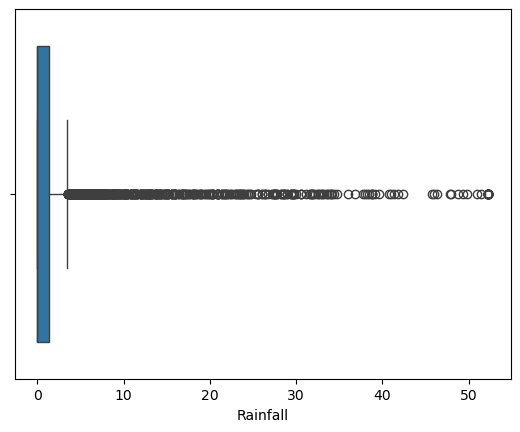

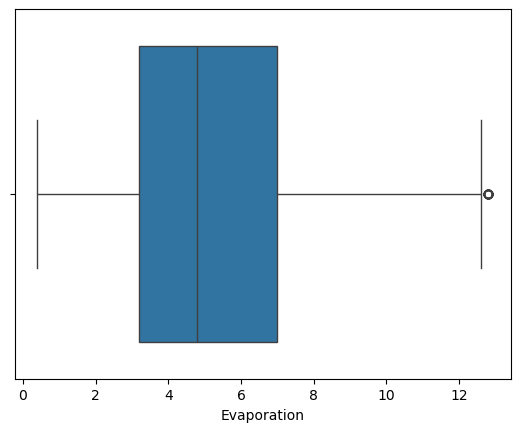

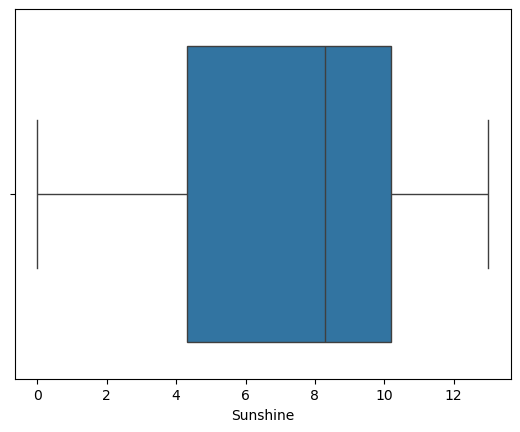

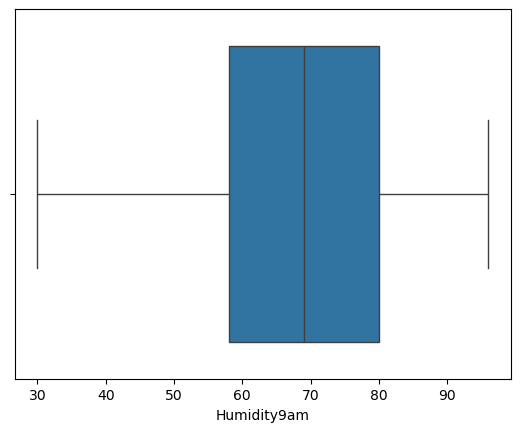

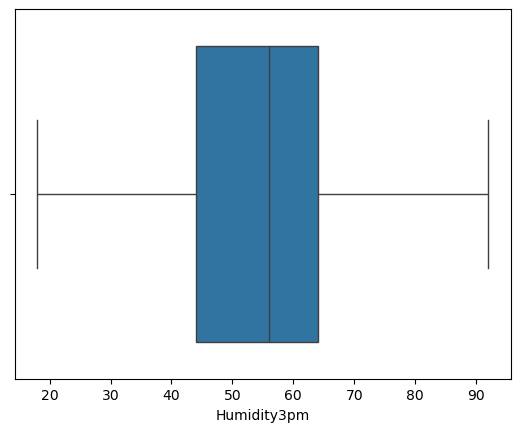

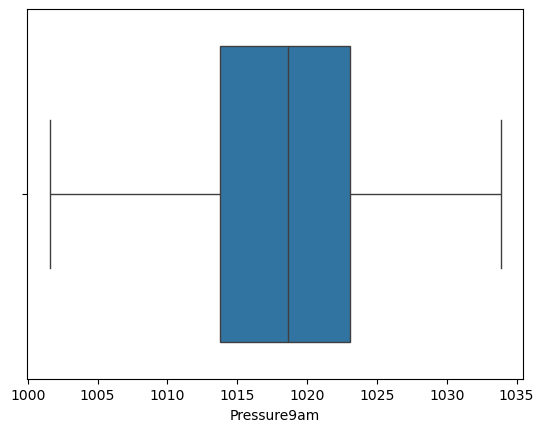

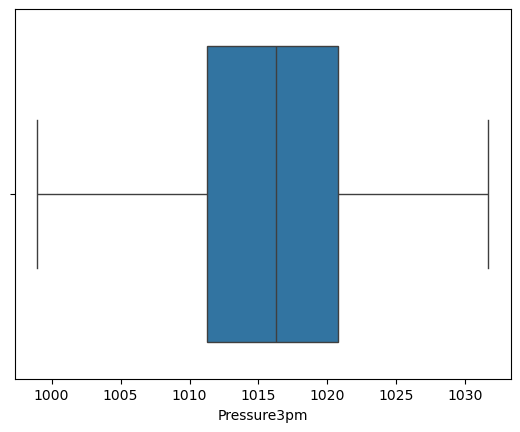

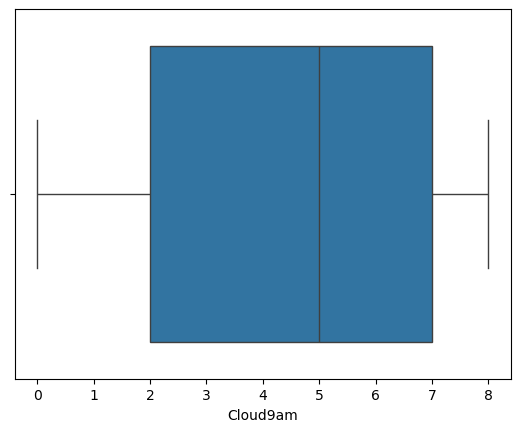

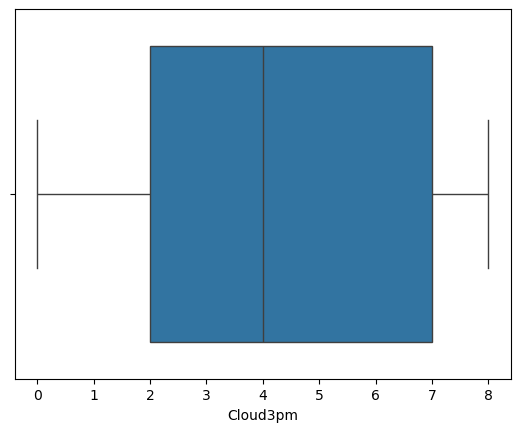

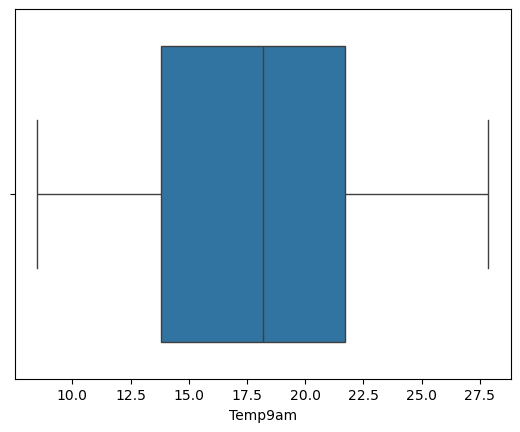

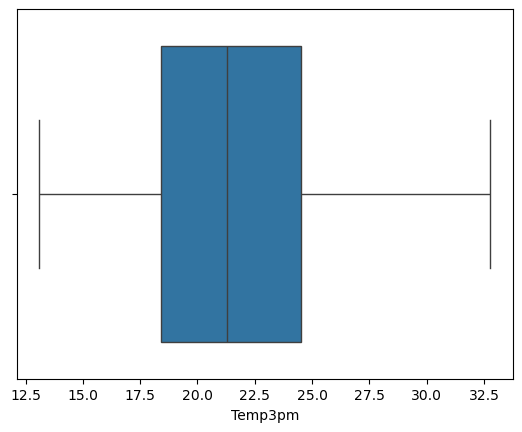

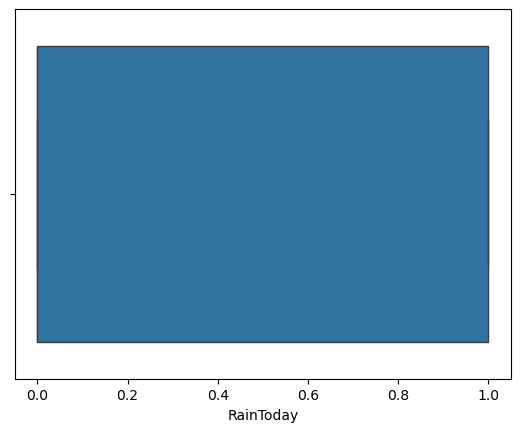

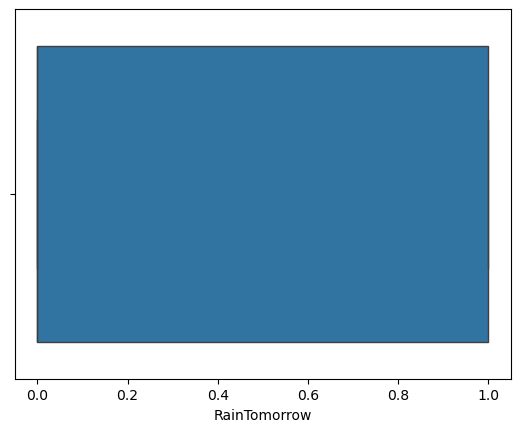

In [24]:
# again check outliers after treatmnet
for coll in df.select_dtypes(include=np.number).columns:
  sns.boxplot(x=df[coll])
  plt.show()

In [25]:
# again check statistics after outliers treatment
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.858046,22.984343,3.111616,5.171262,7.182739,68.261912,54.726701,1018.360189,1016.030331,4.320048,4.181900,17.805417,21.512519,0.259515,0.259215
std,4.516819,4.390301,8.321873,2.714969,3.799364,14.923878,16.129225,6.874804,6.895647,2.523759,2.410918,4.827637,4.175134,0.438434,0.438269
min,6.200000,14.400000,0.000000,0.400000,0.000000,30.000000,18.000000,1001.572000,998.972000,0.000000,0.000000,8.500000,13.100000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,23.500000,35.528000,52.296000,12.800000,13.000000,96.000000,92.000000,1033.856000,1031.664000,8.000000,8.000000,27.864000,32.764000,1.000000,1.000000


# **Plotting Correlation Heatmap**

<Axes: >

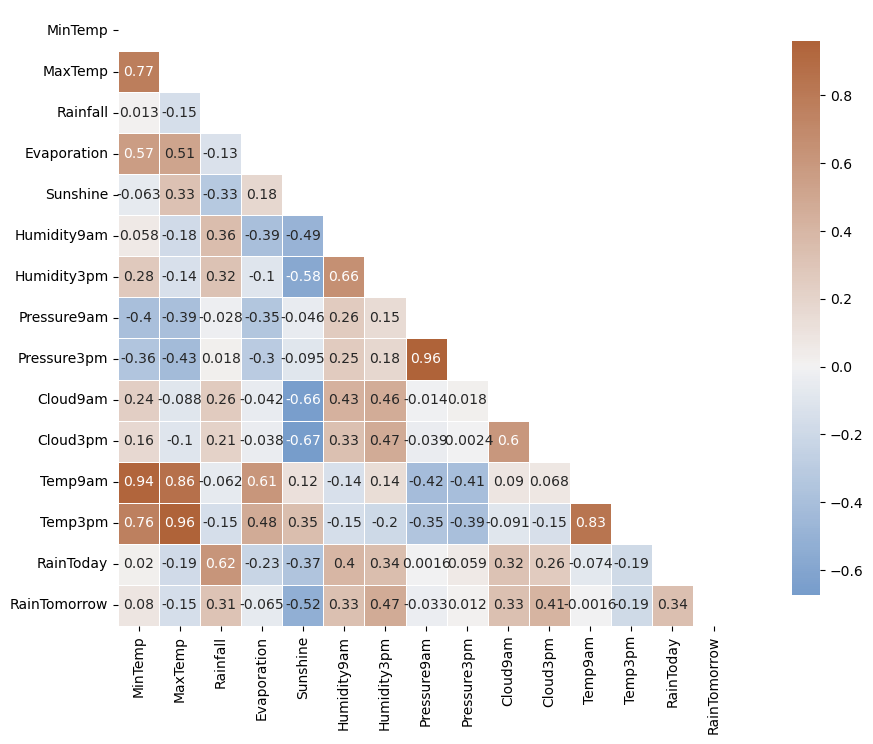

In [27]:
# Correlation Heatmap
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15,8))
cmap = sns.diverging_palette(250, 30, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

##The following pairs are having high correlation between them:

MaxTemp and MinTemp

Pressure9am and Pressure3pm

Temp9am and Temp3pm


##Using pairplot we can visualize better.

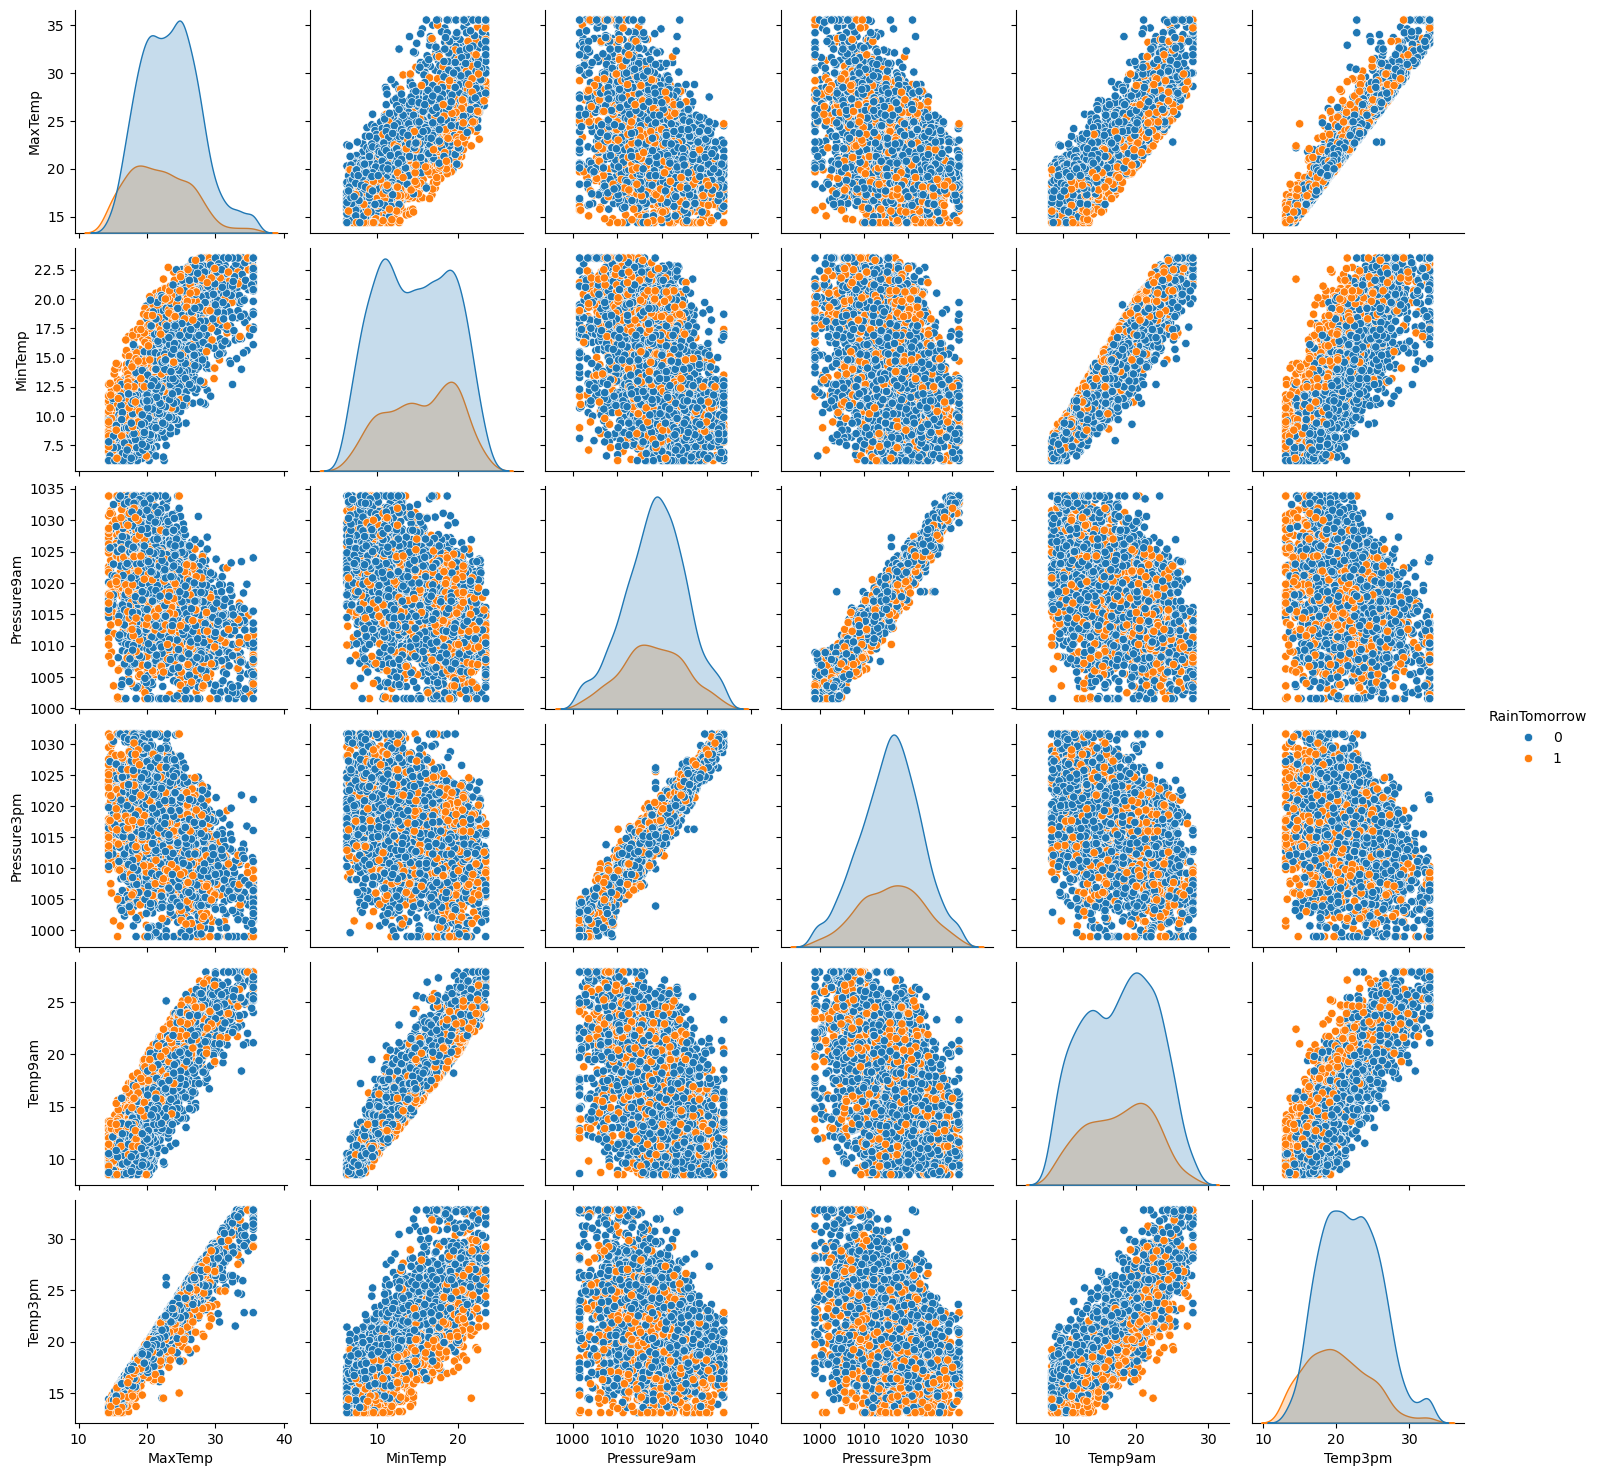

In [29]:
sns.pairplot( data=df, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm'), hue='RainTomorrow' )

# **Training with Different Models**


In [31]:
# define Dependent-Independent data
X = df.drop(columns=['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [32]:
# Split the entire dataset into train and test sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# For getting better results, I standardize data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler only on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Logistic Regression**

Logistic Regression:
Accuracy score for test data: 0.7859281437125748
Accuracy score for training data: 0.7871862120644436
Roc AUC Score: 0.784899389148401
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       484
           1       0.58      0.78      0.67       184

    accuracy                           0.79       668
   macro avg       0.74      0.78      0.76       668
weighted avg       0.82      0.79      0.79       668

Confusion matrix for test data:



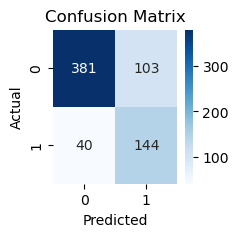

In [35]:
# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Create LogisticRegression object and fit the model
model_lr = LogisticRegression(class_weight='balanced',random_state=42)
model_lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model_lr.predict(X_test_scaled)
y_train_pred= model_lr.predict(X_train_scaled)

# Evaluate the model and print the results
print("Logistic Regression:")

print('Accuracy score for test data:', accuracy_score(y_test, y_pred))
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred))
print('Roc AUC Score:', roc_auc_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
print('Confusion matrix for test data:\n')
cm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(2, 2))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Linear Discriminant Analysis**

LinearDiscriminantAnalysis:
Accuracy score for test data: 0.8173652694610778
Accuracy score for training data: 0.8340202322967404
Roc AUC Score: 0.740904599353216
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       484
           1       0.71      0.57      0.63       184

    accuracy                           0.82       668
   macro avg       0.78      0.74      0.76       668
weighted avg       0.81      0.82      0.81       668

Confusion matrix for test data:



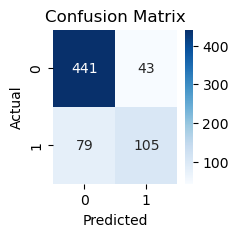

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create a Linear Discriminant Analysis (LDA) object
model_lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the training data
model_lda.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lda = model_lda.predict(X_test_scaled)
y_train_pred_lda = model_lda.predict(X_train_scaled)

# Evaluate the model and print the result
print('LinearDiscriminantAnalysis:')

print('Accuracy score for test data:', accuracy_score(y_test, y_pred_lda))
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_lda))
print('Roc AUC Score:', roc_auc_score(y_test, y_pred_lda))
print('Classification Report:\n', classification_report(y_test, y_pred_lda))

# Confusion Matrix
print('Confusion matrix for test data:\n')
cm_lda = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(2, 2))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **KNN**

KNN:
Accuracy score for test data: 0.8098802395209581
Accuracy score for training data: 0.8860996627950544
Roc AUC Score: 0.7441609773625584
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       484
           1       0.67      0.60      0.63       184

    accuracy                           0.81       668
   macro avg       0.76      0.74      0.75       668
weighted avg       0.80      0.81      0.81       668

Confusion matrix for test data:



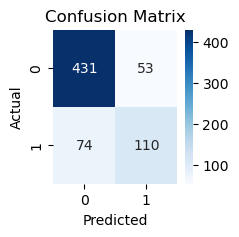

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier with k=3
model_knn = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN classifier to the training data
model_knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = model_knn.predict(X_test_scaled)
y_train_pred_knn = model_knn.predict(X_train_scaled)

# Evaluate the KNN model and print the results
print('KNN:')

print('Accuracy score for test data:', accuracy_score(y_test, y_pred_knn))
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_knn))
print('Roc AUC Score:', roc_auc_score(y_test, y_pred_knn))
print('Classification Report:\n', classification_report(y_test, y_pred_knn))

# Confusion Matrix
print('Confusion matrix for test data:\n')
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(2, 2))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Tuned KNN**

Best parameters: {'n_neighbors': 13}
Best score: 0.8332792264828439
Tuned KNN:
Accuracy score for test data: 0.8083832335329342
Accuracy score for training data: 0.8520044960659423
Roc AUC Score: 0.7195472511678046
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       484
           1       0.71      0.52      0.60       184

    accuracy                           0.81       668
   macro avg       0.77      0.72      0.74       668
weighted avg       0.80      0.81      0.80       668

Confusion matrix for test data:



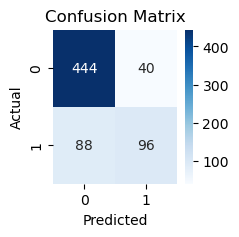

In [41]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search over
param_grid = {'n_neighbors': range(1, 21)}

# Create a KNN classifier object
tuned_knn = KNeighborsClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(tuned_knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Make predictions on the test set using the best parameters
y_pred_knn_tuned = grid_search.predict(X_test_scaled)
y_train_pred_knn_tuned = grid_search.predict(X_train_scaled)

# Evaluate the model and print the result
print('Tuned KNN:')

print('Accuracy score for test data:', accuracy_score(y_test, y_pred_knn_tuned))
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_knn_tuned))
print('Roc AUC Score:', roc_auc_score(y_test, y_pred_knn_tuned))
print('Classification Report:\n', classification_report(y_test, y_pred_knn_tuned))

# Confusion Matrix
print('Confusion matrix for test data:\n')
cm_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
plt.figure(figsize=(2, 2))
sns.heatmap(cm_knn_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **Decison Tree**

Decision Tree:
Accuracy score for test data: 0.7440119760479041
Accuracy score for training data: 0.7879355563881604
Roc AUC Score: 0.7155497664390946
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82       484
           1       0.53      0.65      0.58       184

    accuracy                           0.74       668
   macro avg       0.69      0.72      0.70       668
weighted avg       0.77      0.74      0.75       668

Confusion matrix for test data:



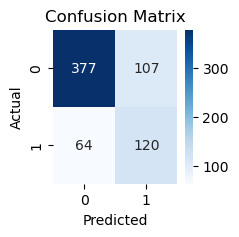

NameError: name 'plot_tree' is not defined

<Figure size 2000x500 with 0 Axes>

In [43]:
# Import the DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
model_dt = DecisionTreeClassifier(max_depth=3,class_weight='balanced',random_state=42)

# Fit the decision tree to the training data
model_dt.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = model_dt.predict(X_test_scaled)
y_train_pred_dt = model_dt.predict(X_train_scaled)


# Evaluate the Decision Tree mode and print the result
print('Decision Tree:')

print('Accuracy score for test data:', accuracy_score(y_test, y_pred_dt))
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_dt))
print('Roc AUC Score:', roc_auc_score(y_test, y_pred_dt))
print('Classification Report:\n', classification_report(y_test, y_pred_dt))

# Confusion Matrix
print('Confusion matrix for test data:\n')
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(2, 2))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the decision tree
plt.figure(figsize=(20,5))
plot_tree(model_dt, filled=True, rounded=True, class_names=['Negative', 'Positive'], feature_names=X.columns)
plt.show()

# **Tuned Decision Tree**

In [ ]:
# Perform grid search cross-validation to find the optimal hyperparameters
param_grid = {'max_depth': range(1, 21)}
grid_search = GridSearchCV(model_dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Make predictions on the test set using the best parameters
y_pred_dt_tuned = grid_search.predict(X_test_scaled)
y_train_pred_dt_tuned = grid_search.predict(X_train_scaled)

# Evaluate the model and print the result
print('Tuned Decision Tree:')

print('Accuracy score for test data:', accuracy_score(y_test, y_pred_dt_tuned))
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_dt_tuned))
print('Roc AUC Score:', roc_auc_score(y_test, y_pred_dt_tuned))
print('Classification Report:\n', classification_report(y_test, y_pred_dt_tuned))

# Confusion Matrix
print('Confusion matrix for test data:\n')
cm_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)
plt.figure(figsize=(2, 2))
sns.heatmap(cm_dt_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the decision tree
plt.figure(figsize=(20,5))
plot_tree(grid_search.best_estimator_, filled=True, rounded=True, class_names=['Negative', 'Positive'], feature_names=X.columns)
plt.show()

# **Random Forest**

In [ ]:
# Import the RandomForestClassifier class
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
model_rf = RandomForestClassifier(class_weight='balanced',random_state=42)

# Fit the random forest to the training data
model_rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test_scaled)
y_train_pred_rf = model_rf.predict(X_train_scaled)

# Evaluate the Random Forest model and print the result
print('Random Forest:')

print('Accuracy score for test data:', accuracy_score(y_test, y_pred_rf))
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_rf))
print('Roc AUC Score:', roc_auc_score(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

# Confusion Matrix
print('Confusion matrix for test data:\n')
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(2, 2))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Plot the feature importances for each tree in the forest
for i, (ax, tree) in enumerate(zip(axes.ravel(), model_rf.estimators_)):
  ax.barh(X.columns, tree.feature_importances_, color='brown', align='center')
  ax.set_title(f'Tree {i + 1}')

# Tight layout and show the plot
plt.tight_layout()
plt.show()


# **Tuned Random Forest**

In [ ]:
# Use GridSearchCV to find the optimal hyperparameters for the Random Forest model
param_grid = {
    'n_estimators': [100,300,500],
    'max_depth': [10,20],
    'min_samples_split': [10],
    'min_samples_leaf': [5],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Train the Random Forest model with the best parameters
rf_tuned = RandomForestClassifier(**best_params)
rf_tuned.fit(X_train_scaled, y_train)

# Make predictions on the test set using the best parameters
y_pred_rf_tuned = rf_tuned.predict(X_test_scaled)
y_train_pred_rf_tuned = rf_tuned.predict(X_train_scaled)

# Evaluate the model and print the result
print('Tuned Random Forest:')

print('Accuracy score for test data:', accuracy_score(y_test, y_pred_rf_tuned))
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_rf_tuned))
print('Roc AUC Score:', roc_auc_score(y_test, y_pred_rf_tuned))
print('Classification Report:\n', classification_report(y_test, y_pred_rf_tuned))

# Confusion Matrix
print('Confusion matrix for test data:\n')
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(2, 2))
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# **XGB Classifier**

In [ ]:
from xgboost import XGBClassifier

# Create an XGBoost classifier object
model_xgb = XGBClassifier()

# Fit the XGBoost model to the training data
model_xgb.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test_scaled)
y_train_pred_xgb = model_xgb.predict(X_train_scaled)


# Evaluate the XGBoost model and print the result
print('XGBoost:')

print('Accuracy score for test data:', accuracy_score(y_test, y_pred_xgb))
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_xgb))
print('Roc AUC Score:', roc_auc_score(y_test, y_pred_xgb))
print('Classification Report:\n', classification_report(y_test, y_pred_xgb))

# Confusion Matrix
print('Confusion matrix for test data:\n')
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(2, 2))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Tuned XGB Classifier**

In [ ]:
# Use GridSearchCV to find the optimal hyperparameters for the XGBoost model
param_grid = {
    'n_estimators': [100,300,500],
    'max_depth': [5,10,15,20],
    'learning_rate': [0.01,0.1],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

grid_search = GridSearchCV(model_xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print('Best parameters:', best_params)
print('Best score:', best_score)

# Train the XGBoost model with the best parameters
xgb_tuned = XGBClassifier(**best_params)
xgb_tuned.fit(X_train_scaled, y_train)

# Make predictions on the test set using the best parameters
y_pred_xgb_tuned = xgb_tuned.predict(X_test_scaled)
y_train_pred_xgb_tuned = xgb_tuned.predict(X_train_scaled)

# Evaluate the model and print the result
print('Tuned XGBoost:')

print('Accuracy score for test data:', accuracy_score(y_test, y_pred_xgb_tuned))
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_xgb_tuned))
print('Roc AUC Score:', roc_auc_score(y_test, y_pred_xgb_tuned))
print('Classification Report:\n', classification_report(y_test, y_pred_xgb_tuned))

# Confusion Matrix
print('Confusion matrix for test data:\n')
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)
plt.figure(figsize=(2, 2))
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier object
model_gb = GradientBoostingClassifier(random_state=42)

# Fit the Gradient Boosting model to the training data
model_gb.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gb = model_gb.predict(X_test_scaled)
y_train_pred_gb = model_gb.predict(X_train_scaled)

# Evaluate the Gradient Boosting model and print the result
print('Gradient Boosting:')

print('Accuracy score for test data:', accuracy_score(y_test, y_pred_gb))
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_gb))
print('Roc AUC Score:', roc_auc_score(y_test, y_pred_gb))
print('Classification Report:\n', classification_report(y_test, y_pred_gb))

# Confusion Matrix
print('Confusion matrix for test data:\n')
cm_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(2, 2))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Tuned Gradient Boosting**

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
}

# Create a GradientBoostingClassifier object
model_gb_tuned = GradientBoostingClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search_gb = GridSearchCV(model_gb_tuned, param_grid, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print('Best parameters for Gradient Boosting:', best_params_gb)
print('Best score for Gradient Boosting:', best_score_gb)

# Train the Gradient Boosting model with the best parameters
gb_tuned = GradientBoostingClassifier(**best_params_gb)
gb_tuned.fit(X_train_scaled, y_train)

# Make predictions on the test set using the best parameters
y_pred_gb_tuned = gb_tuned.predict(X_test_scaled)
y_train_pred_gb_tuned = gb_tuned.predict(X_train_scaled)

# Evaluate the model and print the result
print('Tuned Gradient Boosting:')

print('Accuracy score for test data:', accuracy_score(y_test, y_pred_gb_tuned))
print('Accuracy score for training data:', accuracy_score(y_train, y_train_pred_gb_tuned))
print('Roc AUC Score:', roc_auc_score(y_test, y_pred_gb_tuned))
print('Classification Report:\n', classification_report(y_test, y_pred_gb_tuned))

# Confusion Matrix
print('Confusion matrix for test data:\n')
cm_gb_tuned = confusion_matrix(y_test, y_pred_gb_tuned)
plt.figure(figsize=(2, 2))
sns.heatmap(cm_gb_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Comparison of Test Accuracy Scores for Different Models.**

In [ ]:
# Compare all model's accuracy score of test set

# Create a object
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "Linear Discriminant Analysis": accuracy_score(y_test, y_pred_lda),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Tuned KNN": accuracy_score(y_test, y_pred_knn_tuned),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Tuned Decision Tree": accuracy_score(y_test, y_pred_dt_tuned),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Tuned Random Forest": accuracy_score(y_test, y_pred_rf_tuned),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "Tuned XGBoost": accuracy_score(y_test, y_pred_xgb_tuned),
    "Gradient Boosting": accuracy_score(y_test, y_pred_gb),
    "Tuned Gradient Boosting": accuracy_score(y_test, y_pred_gb_tuned),
}

# Extract model names and accuracy scores
models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

# Create a bar chart with accuracy scores displayed on top
plt.figure(figsize=(15, 6))
bars = plt.bar(models, scores, color='brown')

# Add the accuracy score values on top of each bar
for bar, score in zip(bars, scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(score, 3), ha='center', va='bottom')

plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Test Accuracy Scores for Different Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# **Comparison of Train Accuracy Scores for Different Models.**

In [ ]:
# Compare all model's accuracy score of train set

# Create a object
train_accuracy_scores = {
    "Logistic Regression": accuracy_score(y_train, y_train_pred),
    "Linear Discriminant Analysis": accuracy_score(y_train, y_train_pred_lda),
    "KNN": accuracy_score(y_train, y_train_pred_knn),
    "Tuned KNN": accuracy_score(y_train, y_train_pred_knn_tuned),
    "Decision Tree": accuracy_score(y_train, y_train_pred_dt),
    "Tuned Decision Tree": accuracy_score(y_train, y_train_pred_dt_tuned),
    "Random Forest": accuracy_score(y_train, y_train_pred_rf),
    "Tuned Random Forest": accuracy_score(y_train, y_train_pred_rf_tuned),
    "XGBoost": accuracy_score(y_train, y_train_pred_xgb),
    "Tuned XGBoost": accuracy_score(y_train, y_train_pred_xgb_tuned),
    "Gradient Boosting": accuracy_score(y_train, y_train_pred_gb),
    "Tuned Gradient Boosting": accuracy_score(y_train, y_train_pred_gb_tuned),
}

# Extract model names and accuracy scores
train_models = list(train_accuracy_scores.keys())
train_scores = list(train_accuracy_scores.values())

# Create a bar chart with accuracy scores displayed on top
plt.figure(figsize=(15, 6))
bars = plt.bar(train_models, train_scores, color='brown')

# Add the accuracy score values on top of each bar
for bar, score in zip(bars, train_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(score, 3), ha='center', va='bottom')

plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Train Accuracy Scores for Different Models")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Combine train and test accuracy scores
accuracy_df = pd.DataFrame({
    'Model': train_accuracy_scores.keys(),
    'Train Accuracy': train_accuracy_scores.values(),
    'Test Accuracy': accuracy_scores.values()
})

# Display the DataFrame
accuracy_df.index +=1
print(accuracy_df)

## **1. Your views about the problem statement?**

---
This problem statement presents a challenge of predicting rainfall usig machine learning model to predict rainfall for 'The Daily Buzz', newspaper company in Sydney. The task is to create a classification model using historical weather data from 2008 to 2017, which includes features like temperature, humidity, and cloud cover. Ensemble methods, such as Random Forest and Gradient Boosting, are recommended to achieve higher accuracy. The project emphasizes data preprocessing, including cleaning missing values and feature selection, followed by training various models like decision trees and comparing their performance. Evaluation will be done through accuracy scores and confusion matrices to determine the best-performing model.

---



## **2. What will be your approach to solving this task?**

---
My approach to solving this task as follow:

**Data Import and EDA:**
*   Import the dataset and analyze the data to identify missing values and outliers. Segregate numerical and categorical features. Fill missing numerical values with the median and categorical ones with the mode. Detect and treat outliers using capping techniques.

**Data Preprocessing:**
*   After cleaning the dataset, scale the features using StandardScaler to prepare for model training.

**Model Building and Evaluation:**
*   Try multiple machine learning models to predict rainfall. After initial trials, scale the data and retry models with hyperparameter tuning. Compare the performance using accuracy, precision, and other evaluation metrics.

**Final Comparison and Selection:**
*   Compare all models based on their evaluation scores, visualize the results, and select the best-performing model for rainfall prediction.

---



## **3. What were the available ML model options you had to perform this task?**

---
For this task 'Rainfall Prediction' I have multiple models to perform, like-

1. Logistic Regression
2. Linear Discriminant Analysis(LDA)
3. K-Nearest Neighbors (KNN)
4. Decision Tree
5. Random Forest
6. XGBoost
7. Gradient Boosting
8. Adaboost

---

# **4. Which model’s performance is best and what could be the possible reason for that?**

---

As I have tried many models, among them tuned version of Random Forest, Gradient Boosting, and XGBoost performed well.There is a very slight difference between them, but if I have to select one, I chose the Tuned Random Forest model because it demonstrated the highest test accuracy (0.82) compared to the other models, indicating better generalization on unseen data. Additionally, it showed a good balance between precision and recall for the minority class, which is important in handling class imbalance. Its F1-score for the positive class is also slightly better than the others, indicating a solid trade-off between precision and recall.

While its ROC AUC score is comparable to the other models, the Random Forest offers interpretability with feature importance analysis, which can be crucial for explaining decisions. Its higher training accuracy compared to the others, though a bit overfitted, still reflects strong performance.
___

## **5. What steps can you take to improve this selected model’s performance even further?**
---
To further improve the performance of the Tuned Gradient Boosting model, I would take the following steps:

1. Hyperparameter Tuning
2. Features Engineering
3. Handling Class Imbalance
4. Cross-Validation techniques
5. Feature Selection
6. Increase Data

In the hyperparameter tuning process, I will focus on tuning the learning rate, number of estimators, and max depth of the model. Since this dataset has very few samples for class 1, I will address the class imbalance using techniques like SMOTE (Synthetic Minority Over-sampling Technique).

Additionally, I will remove any irrelevant or redundant features to enhance model performance. If possible, I will also aim to gather more data to improve generalization and ensure that the model performs better.